In [98]:
#dataRFT
import pandas as pd
import re
path ="AT-33_F_PTW_6.125''.xls"
dfRFT=pd.read_excel(path,sheet_name=0,usecols='E:V',skiprows=5,skip_footer=44)
dfRFT.head(30)
dfRFT.drop([0],axis=0,inplace=True)
dfRFT=dfRFT[['TMD_BRT','Form_SG']]        
dfRFT.dropna(inplace=True)


C:\Users\ZKasiditK\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  """


In [99]:
dfRFT.columns = ['DEPT', 'Pressure']
#dfRFT.rename(columns={'TMD_BRT': 'DEPT'})
dfRFT = dfRFT.apply(pd.to_numeric)
dfRFT

,DEPT,Pressure
1,1938.7,2528.7
3,2124.9,2918.9
4,2140.8,3015.3
5,2163.1,3144.0
6,2207.5,3228.5
7,2266.0,3494.1
8,2288.8,3501.9
9,2344.0,3706.3
10,2360.7,3993.2
12,2463.0,3787.5


In [100]:
import pandas as pd
path = "AT-33-F_SX(TCombo)_6.125_DLog_Envi.las"
path
import re
with open(path, encoding="ISO-8859-1") as f:
    header_section = False
    data_section = False
    headers = []
    data = []
    for line in f:
        if header_section and ('~' in line):
            header_section = False

        if '~curve information' in line.lower():
            header_section = True

        if '~A' in line:
            data_section = True

        if header_section and ('#' != line[0]) and ('~' != line[0]):
            headers.append(line.split()[0].split('.')[0].strip())
            
        if data_section and ('#' != line[0]) and ('~' != line[0]):
            data.append(re.split('\s+', line.strip()))

df = pd.DataFrame(data, columns=headers)
dfWD = df.apply(pd.to_numeric)

In [101]:
dfWD=dfWD[['DEPT','AT10','AT20','AT30','AT60','AT90','NPOR','GR']]

In [102]:
dfWD

,DEPT,AT10,AT20,AT30,AT60,AT90,NPOR,GR
0,1518.3612,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
1,1518.5136,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
2,1518.6660,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
3,1518.8184,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
4,1518.9708,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
...,...,...,...,...,...,...,...,...
11310,3242.0052,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
11311,3242.1576,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
11312,3242.3100,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
11313,3242.4624,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25


In [103]:
dfmerge=pd.merge_asof(dfRFT, dfWD, on='DEPT')
dfmerge
#dfmerge.dropna(inplace=True)
#dfmerge

,DEPT,Pressure,AT10,AT20,AT30,AT60,AT90,NPOR,GR
0,1938.7,2528.7,21.05500,17.72452,17.03547,14.79956,13.97728,0.15804,77.99463
1,2124.9,2918.9,5.88981,5.05814,4.69282,4.29323,4.22033,0.21874,61.32174
2,2140.8,3015.3,12.42798,11.75279,12.31442,10.86994,12.72777,0.19185,97.00023
3,2163.1,3144.0,11.36229,9.90138,10.97526,10.21114,8.33613,0.25104,81.43557
4,2207.5,3228.5,8.80200,6.81790,6.59650,5.61703,5.57875,0.17501,65.35363
5,2266.0,3494.1,14.21282,12.58933,12.86717,11.61573,12.93781,0.15890,89.97507
6,2288.8,3501.9,15.33124,12.81998,12.39593,11.12304,12.26368,0.29984,88.50310
7,2344.0,3706.3,12.28993,11.73159,12.28479,11.23652,11.17502,0.20511,84.32339
8,2360.7,3993.2,28.47006,25.72353,25.88420,23.28058,28.55699,0.18816,100.32630
9,2463.0,3787.5,8.04110,7.20643,7.52067,6.71733,6.67863,0.23050,72.62423


In [121]:
dfmergeFW=pd.merge_asof(dfRFT, dfWD, on='DEPT',direction='forward')
dfmergeFW

,DEPT,Pressure,AT10,AT20,AT30,AT60,AT90,NPOR,GR
0,1938.7,2528.7,24.78370,24.14620,22.57958,17.98258,16.30896,0.12902,71.71086
1,2124.9,2918.9,6.12401,5.06172,4.73852,4.36701,4.26938,0.23090,64.78943
2,2140.8,3015.3,12.57223,11.88995,12.50844,11.10712,12.75630,0.19347,98.01077
3,2163.1,3144.0,5.25101,4.90286,5.03897,4.75314,4.39314,0.29754,85.05884
4,2207.5,3228.5,8.43521,6.65292,6.56408,5.60845,5.67657,0.15976,73.34920
5,2266.0,3494.1,14.02713,12.33988,12.58282,11.40964,12.35909,0.17741,88.66683
6,2288.8,3501.9,9.09769,7.91124,7.74466,7.18313,7.64124,0.26722,110.00200
7,2344.0,3706.3,9.87324,9.49171,9.76431,9.18383,9.49038,0.21320,96.20514
8,2360.7,3993.2,27.64426,25.45683,25.97582,22.79129,28.20575,0.19461,95.31029
9,2463.0,3787.5,4.73935,4.01613,4.06903,4.00212,4.00190,0.23464,91.89152


In [105]:
dfmergeBW=pd.merge_asof(dfRFT, dfWD, on='DEPT',direction='backward')
dfmergeBW

,DEPT,Pressure,AT10,AT20,AT30,AT60,AT90,NPOR,GR
0,1938.7,2528.7,21.05500,17.72452,17.03547,14.79956,13.97728,0.15804,77.99463
1,2124.9,2918.9,5.88981,5.05814,4.69282,4.29323,4.22033,0.21874,61.32174
2,2140.8,3015.3,12.42798,11.75279,12.31442,10.86994,12.72777,0.19185,97.00023
3,2163.1,3144.0,11.36229,9.90138,10.97526,10.21114,8.33613,0.25104,81.43557
4,2207.5,3228.5,8.80200,6.81790,6.59650,5.61703,5.57875,0.17501,65.35363
5,2266.0,3494.1,14.21282,12.58933,12.86717,11.61573,12.93781,0.15890,89.97507
6,2288.8,3501.9,15.33124,12.81998,12.39593,11.12304,12.26368,0.29984,88.50310
7,2344.0,3706.3,12.28993,11.73159,12.28479,11.23652,11.17502,0.20511,84.32339
8,2360.7,3993.2,28.47006,25.72353,25.88420,23.28058,28.55699,0.18816,100.32630
9,2463.0,3787.5,8.04110,7.20643,7.52067,6.71733,6.67863,0.23050,72.62423


In [106]:
dfmergeNR=pd.merge_asof(dfRFT, dfWD, on='DEPT',direction='nearest')
dfmergeNR

,DEPT,Pressure,AT10,AT20,AT30,AT60,AT90,NPOR,GR
0,1938.7,2528.7,21.05500,17.72452,17.03547,14.79956,13.97728,0.15804,77.99463
1,2124.9,2918.9,6.12401,5.06172,4.73852,4.36701,4.26938,0.23090,64.78943
2,2140.8,3015.3,12.42798,11.75279,12.31442,10.86994,12.72777,0.19185,97.00023
3,2163.1,3144.0,5.25101,4.90286,5.03897,4.75314,4.39314,0.29754,85.05884
4,2207.5,3228.5,8.43521,6.65292,6.56408,5.60845,5.67657,0.15976,73.34920
5,2266.0,3494.1,14.02713,12.33988,12.58282,11.40964,12.35909,0.17741,88.66683
6,2288.8,3501.9,15.33124,12.81998,12.39593,11.12304,12.26368,0.29984,88.50310
7,2344.0,3706.3,9.87324,9.49171,9.76431,9.18383,9.49038,0.21320,96.20514
8,2360.7,3993.2,28.47006,25.72353,25.88420,23.28058,28.55699,0.18816,100.32630
9,2463.0,3787.5,8.04110,7.20643,7.52067,6.71733,6.67863,0.23050,72.62423


In [120]:
dfmerge=pd.merge(dfmergeFW,dfmergeBW,on='DEPT')
dfmerge

,DEPT,Pressure_x,AT10_x,AT20_x,AT30_x,AT60_x,AT90_x,NPOR_x,GR_x,Pressure_y,AT10_y,AT20_y,AT30_y,AT60_y,AT90_y,NPOR_y,GR_y
0,1938.7,2528.7,24.78370,24.14620,22.57958,17.98258,16.30896,0.12902,71.71086,2528.7,21.05500,17.72452,17.03547,14.79956,13.97728,0.15804,77.99463
1,2124.9,2918.9,6.12401,5.06172,4.73852,4.36701,4.26938,0.23090,64.78943,2918.9,5.88981,5.05814,4.69282,4.29323,4.22033,0.21874,61.32174
2,2140.8,3015.3,12.57223,11.88995,12.50844,11.10712,12.75630,0.19347,98.01077,3015.3,12.42798,11.75279,12.31442,10.86994,12.72777,0.19185,97.00023
3,2163.1,3144.0,5.25101,4.90286,5.03897,4.75314,4.39314,0.29754,85.05884,3144.0,11.36229,9.90138,10.97526,10.21114,8.33613,0.25104,81.43557
4,2207.5,3228.5,8.43521,6.65292,6.56408,5.60845,5.67657,0.15976,73.34920,3228.5,8.80200,6.81790,6.59650,5.61703,5.57875,0.17501,65.35363
5,2266.0,3494.1,14.02713,12.33988,12.58282,11.40964,12.35909,0.17741,88.66683,3494.1,14.21282,12.58933,12.86717,11.61573,12.93781,0.15890,89.97507
6,2288.8,3501.9,9.09769,7.91124,7.74466,7.18313,7.64124,0.26722,110.00200,3501.9,15.33124,12.81998,12.39593,11.12304,12.26368,0.29984,88.50310
7,2344.0,3706.3,9.87324,9.49171,9.76431,9.18383,9.49038,0.21320,96.20514,3706.3,12.28993,11.73159,12.28479,11.23652,11.17502,0.20511,84.32339
8,2360.7,3993.2,27.64426,25.45683,25.97582,22.79129,28.20575,0.19461,95.31029,3993.2,28.47006,25.72353,25.88420,23.28058,28.55699,0.18816,100.32630
9,2463.0,3787.5,4.73935,4.01613,4.06903,4.00212,4.00190,0.23464,91.89152,3787.5,8.04110,7.20643,7.52067,6.71733,6.67863,0.23050,72.62423


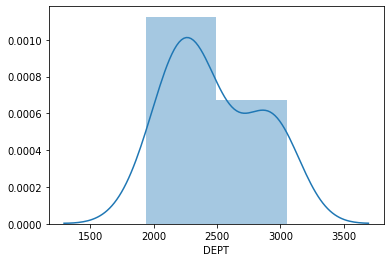

In [108]:
import seaborn as sns

x = (dfmerge['DEPT'])
sns.distplot(x)

In [122]:
from sklearn import linear_model
import statsmodels.api as sm

In [124]:
X = dfmergeNR[['DEPT','AT10','AT20','AT30','AT60','AT90','NPOR','GR']]
Y = dfmergeNR['Pressure']

In [125]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -2590.339525249121
Coefficients: 
 [    2.6179769   -248.07746324   871.57057222  -762.17811007
   125.87978442    51.09102668 -1506.41115705     6.20164625]


In [129]:
valuetest=[1938.83,24.78,24.14,22.57,17.98,16.30,0.12,71.71086]
regr.predict([valuetest])

array([3535.5250557])